In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#colors = ["#FF0B04", "#4374B3"]
sns.set_palette(sns.color_palette("bright"))

In [2]:
# Assign spreadsheet filename: file
file = 'kpmg_data.xlsx'

# Load spreadsheet: xl
xl = pd.ExcelFile(file)

# Print sheet names
print(xl.sheet_names)

['Title Sheet', 'Transactions', 'NewCustomerList', 'CustomerDemographic', 'CustomerAddress']


In [3]:
# Load merged table (customer_demographic and transactions tables)
merged = pd.read_excel('merged.xlsx', index_col=0)

In [4]:
merged.head()

,customer_id,first_name,last_name,gender,num_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,...,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,...,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0,110.56
1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,...,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0,751.02
2,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,...,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0,189.28
3,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,...,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0,90.10
4,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,...,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0,17.87


In [5]:
temp= pd.read_excel('customer_address.xlsx', index_col=0)

In [6]:
tp = pd.merge(merged,temp, on='customer_id', how='left')

In [80]:
tp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20307 entries, 0 to 20306
Data columns (total 30 columns):
customer_id                20307 non-null int64
first_name                 20307 non-null object
last_name                  20307 non-null object
gender                     20307 non-null object
num_purchases              20307 non-null int64
DOB                        20307 non-null datetime64[ns]
job_title                  20307 non-null object
job_industry_category      20307 non-null object
wealth_segment             20307 non-null object
owns_car                   20307 non-null object
tenure                     20307 non-null int64
age                        20307 non-null int64
transaction_id             19800 non-null float64
product_id                 19800 non-null float64
transaction_date           19800 non-null datetime64[ns]
online_order               19800 non-null float64
order_status               19800 non-null object
brand                      19800 non-null o

In [8]:
profit_by_state=tp.groupby('state').agg({'profit':np.sum}).reset_index()

Text(0.5, 1.0, 'Profit by State')

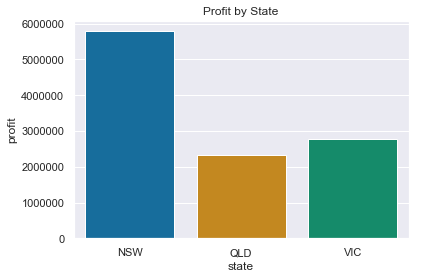

In [22]:
sns.set_palette(sns.color_palette("colorblind"))
ax=sns.barplot(x='state', y='profit', data=profit_by_state)
ax.set_title('Profit by State')

In [126]:
profit_by_brand=tp.groupby("brand").agg({'profit':np.sum}).reset_index()

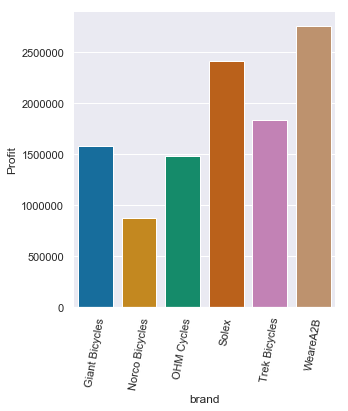

In [128]:
sns.set_palette(sns.color_palette("colorblind"))
ax=sns.catplot(x='brand', y='profit',data=profit_by_brand,kind="bar")
plt.xticks(rotation=80)
ax.despine(left=True)
#ax.set_title('Profit by brand')
ax.set_ylabels("Profit")

In [93]:
profit_by_brand_state=tp.groupby(['state','brand']).agg({'profit':np.sum}).reset_index()

Text(0.5, 1.0, 'Profit of Brands in Each State')

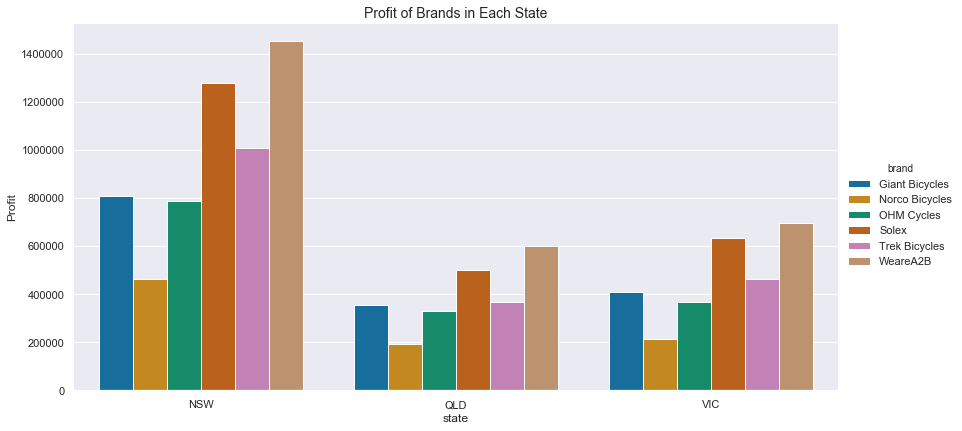

In [124]:
sns.set_palette(sns.color_palette("colorblind"))
ax=sns.catplot(x='state', y='profit',hue="brand",data=profit_by_brand_state,kind="bar",height=6,aspect=2)
#plt.xticks(rotation=80)
ax.despine(left=True)
#ax.set_title('Profit by brand')
ax.set_ylabels("Profit")
plt.title("Profit of Brands in Each State",fontsize=14)

In [11]:
# Profit by age
profit_by_age = merged.groupby('age').agg({'profit':np.sum}).reset_index()  # 40 -47

Text(0.5, 1.0, 'Profit by Age')

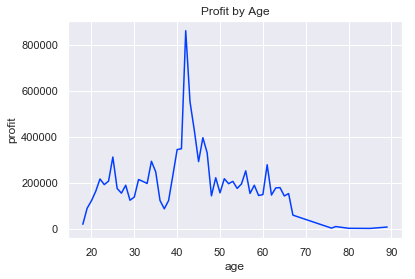

In [23]:
sns.set_palette(sns.color_palette("bright"))
ax = sns.lineplot(x='age', y='profit', data=profit_by_age)
ax.set_title('Profit by Age')

In [13]:
# Profit by job_industry_category
profit_by_job_ind = merged.groupby('job_industry_category').agg({'profit':np.sum}).reset_index()

In [14]:
profit_by_job_ind

,job_industry_category,profit
0,Argiculture,302991.35
1,Entertainment,386109.45
2,Financial Services,2153575.18
3,Health,1667645.53
4,IT,606538.42
5,Manufacturing,2167718.16
6,Property,703502.06
7,Retail,982011.36
8,Telecommunications,187400.01
9,Unknown,1772522.96


In [15]:
# Load data excluding unknown category 
data = profit_by_job_ind[:9]

Text(0.5, 1.0, 'Profit by Job Industry Category')

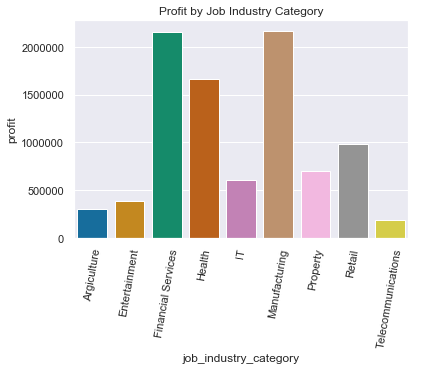

In [21]:
sns.set_palette(sns.color_palette("colorblind"))
ax = sns.barplot(x='job_industry_category', y='profit', data=data)
plt.xticks(rotation=80)
ax.set_title("Profit by Job Industry Category")

In [26]:
# Profit by wealth_segment
profit_by_wealth = merged.groupby('wealth_segment').agg({'profit':np.sum}).reset_index()

In [27]:
profit_by_wealth

,wealth_segment,profit
0,Affluent Customer,2678010.87
1,High Net Worth,2770519.63
2,Mass Customer,5481483.98


Text(0.5, 1.0, 'Profit by Wealth Segment')

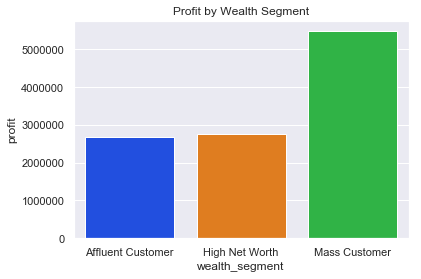

In [28]:
sns.set_palette(sns.color_palette("bright"))
ax = sns.barplot(x='wealth_segment', y='profit', data=profit_by_wealth)
ax.set_title('Profit by Wealth Segment')

In [29]:
# Profit by customer_id
new_data = merged.groupby(['customer_id']).agg({'profit':np.sum}).reset_index()
new_data.head()

,customer_id,profit
0,1,3018.09
1,2,2226.26
2,3,3362.81
3,4,220.57
4,5,2394.94


In [30]:
# Load customer_demographic table
customer = pd.read_excel('customer_demographic.xlsx', index_col=0)

In [31]:
# Merge new_data and customer table 
merge_1 = pd.merge(new_data, customer, on='customer_id', how='left')
merge_1.head()

,customer_id,profit,first_name,last_name,gender,num_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,age
0,1,3018.09,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,67
1,2,2226.26,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,Yes,16.0,40
2,3,3362.81,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,Yes,15.0,66
3,4,220.57,Talbot,Unknown,Male,33,1961-10-03,Unknown,IT,Mass Customer,No,7.0,59
4,5,2394.94,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Unknown,Affluent Customer,Yes,8.0,43


In [32]:
# Labeling dataset with 0 and 1
df = merge_1
age = df.age
profit = df.profit
job_ind = df.job_industry_category
wealth = df.wealth_segment
df['label'] = None
for i in range(len(df)):
    cond_1 = age[i] >= 40 and age[i] <= 47
    cond_2 = job_ind[i] == 'Manufacturing' or job_ind[i] == 'Financial Services' or job_ind[i] == 'Health' 
    cond_3 = wealth[i] == 'Mass Customer'
    cond_4 = profit[i] > 0
    
    if cond_1 and cond_2 and cond_4:
        df['label'][i] = 1
    elif cond_2 and cond_3 and cond_4:
        df['label'][i] = 1  
    elif cond_1 and cond_3 and cond_4:
        df['label'][i] = 1
    else:
        df['label'][i] = 0

In [33]:
df.head()

,customer_id,profit,first_name,last_name,gender,num_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,age,label
0,1,3018.09,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,67,1
1,2,2226.26,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,Yes,16.0,40,1
2,3,3362.81,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,Yes,15.0,66,0
3,4,220.57,Talbot,Unknown,Male,33,1961-10-03,Unknown,IT,Mass Customer,No,7.0,59,0
4,5,2394.94,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Unknown,Affluent Customer,Yes,8.0,43,0


In [34]:
# Distribution of labels
df.label.value_counts()

0    2480
1    1520
Name: label, dtype: int64

In [35]:
2480/4000

0.62

In [36]:
1520/4000

0.38

In [37]:
# Save merged table as df
df = df.to_excel('df.xlsx', engine='xlsxwriter')
df = pd.read_excel('df.xlsx', index_col=0)

In [38]:
# Select data with label 1
df_1 = df[df.label==1]
df_1.head()

,customer_id,profit,first_name,last_name,gender,num_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,age,label
0,1,3018.09,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11,67,1
1,2,2226.26,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,Yes,16,40,1
6,7,220.11,Fina,Merali,Female,6,1976-02-23,Unknown,Financial Services,Affluent Customer,Yes,11,44,1
9,10,3358.28,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,Yes,20,32,1
11,12,3540.03,Sawyere,Flattman,Male,58,1994-07-21,Nuclear Power Engineer,Manufacturing,Mass Customer,No,8,26,1


In [39]:
# Select data with label 0
df_0 = df[df.label==0]
df_0.head()

,customer_id,profit,first_name,last_name,gender,num_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,age,label
2,3,3362.81,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,Yes,15,66,0
3,4,220.57,Talbot,Unknown,Male,33,1961-10-03,Unknown,IT,Mass Customer,No,7,59,0
4,5,2394.94,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Unknown,Affluent Customer,Yes,8,43,0
5,6,3946.55,Curr,Duckhouse,Male,35,1966-09-16,Unknown,Retail,High Net Worth,Yes,13,54,0
7,8,7066.94,Rod,Inder,Male,31,1962-03-30,Media Manager I,Unknown,Mass Customer,No,7,58,0


In [40]:
# Split datasets into train and valid
from sklearn.model_selection import train_test_split
train_1, valid_1 = train_test_split(df_1, test_size=0.25, random_state=42)
train_2, valid_2 = train_test_split(df_0, test_size=0.25, random_state=42)

In [41]:
# Concatenate respective train and valid dataset (for balanced ratio of label 0 and label 1)
train = pd.concat([train_1, train_2], axis=0)
valid = pd.concat([valid_1, valid_2], axis=0)

In [42]:
len(train)

3000

In [43]:
len(valid)

1000

In [44]:
# Shuffle train and valid datasets
train = train.sample(frac=1).reset_index(drop=True)
valid = valid.sample(frac=1).reset_index(drop=True)

In [45]:
train.head()

,customer_id,profit,first_name,last_name,gender,num_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,age,label
0,2229,2114.24,Linette,Gotmann,Female,76,1959-04-10,Cost Accountant,Financial Services,Affluent Customer,Yes,7,61,0
1,511,2782.88,Theo,Tolmie,Female,92,1982-12-02,Dental Hygienist,Health,High Net Worth,No,10,38,0
2,3895,0.00,Reginald,Struys,Male,18,1994-09-06,Business Systems Development Analyst,IT,Affluent Customer,Yes,2,26,0
3,2296,3592.50,Nathalia,Sanger,Female,16,2002-01-01,Geologist IV,Retail,Affluent Customer,No,1,18,0
4,3073,1264.33,Hernando,Farnham,Male,16,1967-04-12,Nurse,Telecommunications,Affluent Customer,No,17,53,0


In [46]:
valid.head()

,customer_id,profit,first_name,last_name,gender,num_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,age,label
0,940,3256.14,Marnia,Claesens,Female,3,1987-06-16,Administrative Officer,Manufacturing,Mass Customer,No,9,33,1
1,2945,397.23,Arlan,Unknown,Male,79,1972-05-26,Safety Technician IV,Unknown,Mass Customer,No,18,48,0
2,255,6813.82,Keeley,Kruger,Female,2,1954-01-15,Desktop Support Technician,IT,Mass Customer,No,5,66,0
3,1560,486.61,Tymon,Blackstone,Male,14,1973-01-12,Unknown,Retail,Mass Customer,No,5,47,1
4,506,6985.24,Brett,Scrancher,Female,43,1985-02-14,Health Coach II,Retail,Mass Customer,No,21,35,0


In [47]:
# Drop columns not necessary for analysis
drop_fields = ['customer_id', 'profit', 'first_name', 'last_name', 'DOB']
Train = train.drop(drop_fields, axis=1)
Valid = valid.drop(drop_fields, axis=1)

In [48]:
train_label = Train.label

In [49]:
Train.index

RangeIndex(start=0, stop=3000, step=1)

In [50]:
Valid.index

RangeIndex(start=0, stop=1000, step=1)

In [51]:
valid_label = Valid.label

In [52]:
train_X = Train.drop('label', axis=1)
train_X.head()

,gender,num_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,age
0,Female,76,Cost Accountant,Financial Services,Affluent Customer,Yes,7,61
1,Female,92,Dental Hygienist,Health,High Net Worth,No,10,38
2,Male,18,Business Systems Development Analyst,IT,Affluent Customer,Yes,2,26
3,Female,16,Geologist IV,Retail,Affluent Customer,No,1,18
4,Male,16,Nurse,Telecommunications,Affluent Customer,No,17,53


In [53]:
valid_X = Valid.drop('label', axis=1)
valid_X.head()

,gender,num_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,age
0,Female,3,Administrative Officer,Manufacturing,Mass Customer,No,9,33
1,Male,79,Safety Technician IV,Unknown,Mass Customer,No,18,48
2,Female,2,Desktop Support Technician,IT,Mass Customer,No,5,66
3,Male,14,Unknown,Retail,Mass Customer,No,5,47
4,Female,43,Health Coach II,Retail,Mass Customer,No,21,35


In [54]:
# Load new_customer table as test
test = pd.read_excel('new_customer.xlsx', index_col=0)
test.head()

,first_name,last_name,gender,num_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,63
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,50
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,46
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,41
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,55


In [55]:
# Drop columns not necessary for analysis
drop_fields = ['first_name', 'last_name', 'DOB', 'deceased_indicator', 'address', 'postcode', 'state', 'country', 'property_valuation', 'Rank', 'Value']

In [56]:
Test = test.drop(drop_fields, axis=1)
Test.head()

,gender,num_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,age
0,Male,86,General Manager,Manufacturing,Mass Customer,Yes,14,63
1,Male,69,Structural Engineer,Property,Mass Customer,No,16,50
2,Female,10,Senior Cost Accountant,Financial Services,Affluent Customer,No,10,46
3,Female,64,Account Representative III,Manufacturing,Affluent Customer,Yes,5,41
4,Female,34,Financial Analyst,Financial Services,Affluent Customer,No,19,55


In [57]:
# Distribution of gender in test
Test.gender.value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [58]:
# Concatnate all tables for one-hot encoding
df_all = pd.concat([train_X, valid_X, Test])
df_all.head()

,gender,num_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,age
0,Female,76,Cost Accountant,Financial Services,Affluent Customer,Yes,7,61
1,Female,92,Dental Hygienist,Health,High Net Worth,No,10,38
2,Male,18,Business Systems Development Analyst,IT,Affluent Customer,Yes,2,26
3,Female,16,Geologist IV,Retail,Affluent Customer,No,1,18
4,Male,16,Nurse,Telecommunications,Affluent Customer,No,17,53


In [59]:
# One-hot encoding of df_all
dummy_fields = ['gender', 'job_title', 'job_industry_category', 'wealth_segment', 'owns_car']
for each in dummy_fields:
    dummies = pd.get_dummies(df_all[each], prefix=each, drop_first=False)
    df_all = pd.concat([df_all, dummies], axis=1)

In [60]:
# Drop original columns one-hot-encoded
drop_fields = ['gender', 'job_title', 'job_industry_category', 'wealth_segment', 'owns_car']
df_all = df_all.drop(drop_fields, axis=1)
df_all

,num_purchases,tenure,age,gender_Female,gender_Male,gender_U,job_title_Account Coordinator,job_title_Account Executive,job_title_Account Representative I,job_title_Account Representative II,...,job_industry_category_Manufacturing,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications,job_industry_category_Unknown,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,owns_car_No,owns_car_Yes
0,76,7,61,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,92,10,38,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,18,2,26,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,16,1,18,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4,16,17,53,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
5,38,5,37,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
6,4,11,47,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
7,93,9,40,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
8,16,11,41,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
9,73,3,22,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [61]:
X_train = df_all.iloc[0:3000]
X_train

,num_purchases,tenure,age,gender_Female,gender_Male,gender_U,job_title_Account Coordinator,job_title_Account Executive,job_title_Account Representative I,job_title_Account Representative II,...,job_industry_category_Manufacturing,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications,job_industry_category_Unknown,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,owns_car_No,owns_car_Yes
0,76,7,61,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,92,10,38,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,18,2,26,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,16,1,18,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4,16,17,53,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
5,38,5,37,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
6,4,11,47,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
7,93,9,40,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
8,16,11,41,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
9,73,3,22,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [62]:
X_valid = df_all.iloc[3000:4000]
X_valid

,num_purchases,tenure,age,gender_Female,gender_Male,gender_U,job_title_Account Coordinator,job_title_Account Executive,job_title_Account Representative I,job_title_Account Representative II,...,job_industry_category_Manufacturing,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications,job_industry_category_Unknown,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,owns_car_No,owns_car_Yes
0,3,9,33,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
1,79,18,48,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
2,2,5,66,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,14,5,47,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
4,43,21,35,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
5,39,13,45,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
6,10,13,41,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
7,3,12,43,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
8,36,7,49,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
9,3,17,50,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [63]:
X_test = df_all.iloc[4000:5000]
X_test

,num_purchases,tenure,age,gender_Female,gender_Male,gender_U,job_title_Account Coordinator,job_title_Account Executive,job_title_Account Representative I,job_title_Account Representative II,...,job_industry_category_Manufacturing,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications,job_industry_category_Unknown,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,owns_car_No,owns_car_Yes
0,86,14,63,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
1,69,16,50,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
2,10,10,46,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,64,5,41,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
4,34,19,55,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
5,39,22,69,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
6,23,8,44,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
7,74,10,48,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
8,50,5,48,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
9,72,17,35,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [64]:
y_train = train_label
y_valid = valid_label

In [65]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [66]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100,random_state=123456),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]
log_cols=["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

In [67]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_valid)
    acc = accuracy_score(y_valid, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    #train_predictions = clf.predict_proba(X_test)
    #ll = log_loss(y_test, train_predictions)
    #print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 68.2000%
SVC
****Results****
Accuracy: 62.0000%
NuSVC
****Results****
Accuracy: 89.4000%
DecisionTreeClassifier
****Results****
Accuracy: 92.2000%
RandomForestClassifier
****Results****
Accuracy: 92.5000%
AdaBoostClassifier
****Results****
Accuracy: 92.2000%
GradientBoostingClassifier
****Results****
Accuracy: 94.7000%
GaussianNB
****Results****
Accuracy: 49.0000%
LinearDiscriminantAnalysis
****Results****
Accuracy: 81.4000%
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 50.5000%


<Figure size 1440x720 with 0 Axes>

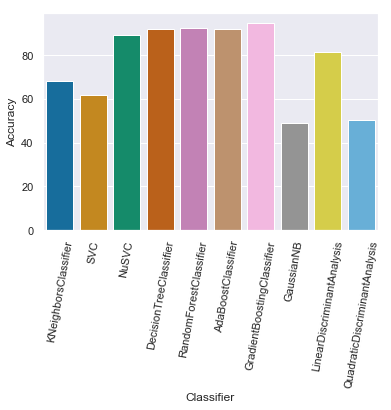

<Figure size 1440x720 with 0 Axes>

In [135]:
#sns.set_palette(sns.color_palette("bright"))
sns.barplot(x=log['Classifier'],y=log['Accuracy'],data=log)
plt.xticks(rotation=80)
plt.figure(figsize=(20,10))

In [69]:
lda=LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

predicted = lda.predict(X_valid)
accuracy = accuracy_score(y_valid, predicted)

#print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Mean accuracy score: 0.814


In [70]:

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

predicted = gb.predict(X_valid)
accuracy = accuracy_score(y_valid, predicted)*100

print(f'Mean accuracy score: {accuracy:.3}')

Mean accuracy score: 94.8


In [71]:
(predicted == 1).sum()

424

In [72]:
# Predict on test data
test_pred = gb.predict(X_test)

In [73]:
test_pred = pd.Series(test_pred)

In [74]:
(test_pred==1).sum()

363

In [75]:
1000 - 365

635

In [76]:
# Labelling test dataset with predicted labels
pd.set_option('display.max_rows', 1000)
labeled_test = pd.concat([Test, test_pred], axis=1)
labeled_test.rename(columns={0:'label'})

,gender,num_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,age,label
0,Male,86,General Manager,Manufacturing,Mass Customer,Yes,14,63,1
1,Male,69,Structural Engineer,Property,Mass Customer,No,16,50,0
2,Female,10,Senior Cost Accountant,Financial Services,Affluent Customer,No,10,46,0
3,Female,64,Account Representative III,Manufacturing,Affluent Customer,Yes,5,41,1
4,Female,34,Financial Analyst,Financial Services,Affluent Customer,No,19,55,0
5,Female,39,Assistant Media Planner,Entertainment,High Net Worth,Yes,22,69,0
6,Male,23,Compensation Analyst,Financial Services,Mass Customer,No,8,44,1
7,Female,74,Human Resources Assistant II,Retail,Mass Customer,Yes,10,48,0
8,Male,50,Speech Pathologist,Manufacturing,Mass Customer,Yes,5,48,1
9,Male,72,Accounting Assistant IV,IT,Mass Customer,Yes,17,35,0


In [77]:
x_1 = ['label 0', 'label 1']
y_1 = [2480, 1520]

In [78]:
x_2 = ['label 0', 'label 1']
y_2 = [635, 365]

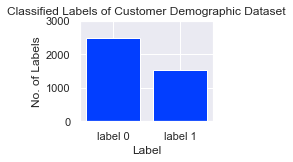

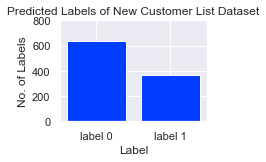

In [79]:
plt.subplot(2, 2, 1)
plt.bar(x_1, y_1)
plt.xlabel('Label')
plt.ylabel('No. of Labels')
plt.ylim(0, 3000)
plt.title('Classified Labels of Customer Demographic Dataset')
plt.tight_layout()
plt.show()

plt.subplot(2, 2, 2)
plt.bar(x_2, y_2)
plt.xlabel('Label')
plt.ylim(0, 800)
plt.ylabel('No. of Labels')
plt.title('Predicted Labels of New Customer List Dataset')
plt.tight_layout()
plt.show()

In [139]:
conv= labeled_test.to_excel('labeled_test.xlsx', engine='xlsxwriter')